In [55]:
import sys
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# Add OpenPose's compiled directories to path
sys.path.append('C:\\Users\\mrpho\\Documents\\GitHub\\openpose\\build\\python\\openpose\\Release')
os.environ['PATH']  = os.environ['PATH'] + ';' + 'C:\\Users\\mrpho\\Documents\\GitHub\\openpose\\build\\x64\\Release;' + 'C:\\Users\\mrpho\\Documents\\GitHub\\openpose\\build\\bin;'
import pyopenpose as op
print(op)

<module 'pyopenpose' from 'C:\\Users\\mrpho\\Documents\\GitHub\\openpose\\build\\python\\openpose\\Release\\pyopenpose.cp37-win_amd64.pyd'>


#### Test OpenPose on Image

In [3]:
# Load OpenPose default params?
params = dict()
params["model_folder"] = "C:\\Users\\mrpho\\Documents\\GitHub\\openpose\\models"

# Start OpenPose
opWrapper = op.WrapperPython()
opWrapper.configure(params)
opWrapper.start()

In [4]:
# Load image into an OpenPose Datum object
datum = op.Datum()
imageToProcess = cv2.imread("distracted.jpg")
datum.cvInputData = imageToProcess
opWrapper.emplaceAndPop([datum])

In [5]:
# Display Image
print("Body keypoints: \n" + str(datum.poseKeypoints))

Body keypoints: 
[[[3.09686310e+02 2.83692261e+02 8.41935277e-01]
  [3.21631439e+02 4.79216888e+02 6.88667417e-01]
  [1.82026093e+02 4.85157776e+02 6.24406755e-01]
  [1.54137604e+02 7.12583130e+02 5.82682014e-01]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [4.53304565e+02 4.73196411e+02 6.05065048e-01]
  [4.71253418e+02 6.92642639e+02 4.51833576e-01]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [2.81751862e+02 2.57806641e+02 8.32415342e-01]
  [3.41592316e+02 2.59729523e+02 8.58233154e-01]
  [2.47749496e+02 2.77710999e+02 8.68753791e-01]
  [3.91397369e+02 2.81738403e+02 8.65731537e-01]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [

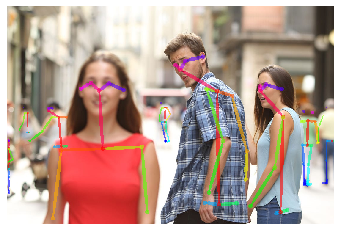

In [6]:
plt.axis("off")
plt.imshow(cv2.cvtColor(datum.cvOutputData, cv2.COLOR_BGR2RGB)) # Have to convert opencv's BGR type to RGB.
plt.show()

#### Function for using OpenPose

In [7]:
# Load OpenPose default params?
params = dict()
params["model_folder"] = "C:\\Users\\mrpho\\Documents\\GitHub\\openpose\\models"

# Start OpenPose
opWrapper = op.WrapperPython()
opWrapper.configure(params)
opWrapper.start()

def getPoseData(cv2img):
    datum = op.Datum()
    datum.cvInputData = cv2img
    opWrapper.emplaceAndPop([datum])
    return datum

#### Get frame by frame in OpenCV

In [8]:
frames = []

cap = cv2.VideoCapture('triangle.mp4')

if (cap.isOpened() is False):
    print("Error opening video stream or file")
else:
    print("Opened successfully")

success = True
while success:
    success, image = cap.read()
    frames.append(image)

cap.release()
print("Finished getting frames.")
print("Frames captured: ", len(frames))

Opened successfully
Finished getting frames.
Frames captured:  139


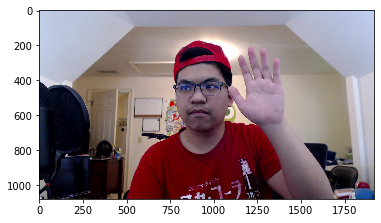

In [9]:
plt.imshow(cv2.cvtColor(frames[0], cv2.COLOR_BGR2RGB))

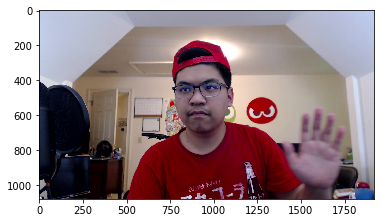

In [10]:
plt.imshow(cv2.cvtColor(frames[60], cv2.COLOR_BGR2RGB))

#### OpenPose on test images from video?

In [11]:
# Load OpenPose default params?
params = dict()
params["model_folder"] = "C:\\Users\\mrpho\\Documents\\GitHub\\openpose\\models"

# Start OpenPose
opWrapper = op.WrapperPython()
opWrapper.configure(params)
opWrapper.start()

# Load image into an OpenPose Datum object
datum0 = getPoseData(frames[0])

In [12]:
# Show OpenPose result
keypoints = datum0.poseKeypoints
print("Body keypoints: \n" + str(keypoints))

Body keypoints: 
[[[9.0699304e+02 5.0371017e+02 8.4249949e-01]
  [9.5416473e+02 8.0697009e+02 6.2608027e-01]
  [6.8917474e+02 8.5700610e+02 3.7599802e-01]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [1.2219686e+03 7.3922913e+02 4.4177166e-01]
  [1.5898593e+03 1.0748269e+03 1.8975830e-01]
  [1.3749430e+03 6.4216626e+02 5.8580428e-01]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [8.3927600e+02 4.3914758e+02 8.4512639e-01]
  [9.8059222e+02 4.3626913e+02 8.8328892e-01]
  [7.8630438e+02 5.2443402e+02 4.0235293e-01]
  [1.0952858e+03 5.0663394e+02 8.6905557e-01]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 

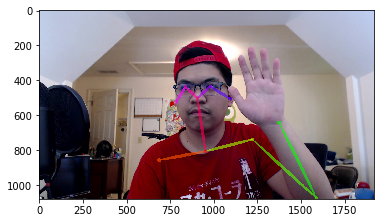

In [13]:
plt.imshow(cv2.cvtColor(datum0.cvOutputData, cv2.COLOR_BGR2RGB)) # Have to convert opencv's BGR type to RGB.
plt.show()

In [14]:
print(keypoints.dtype)

float32


In [15]:
print(keypoints.shape)

(1, 25, 3)


In [16]:
keypoints = keypoints.reshape((-1, 3))
print(keypoints)

[[9.0699304e+02 5.0371017e+02 8.4249949e-01]
 [9.5416473e+02 8.0697009e+02 6.2608027e-01]
 [6.8917474e+02 8.5700610e+02 3.7599802e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.2219686e+03 7.3922913e+02 4.4177166e-01]
 [1.5898593e+03 1.0748269e+03 1.8975830e-01]
 [1.3749430e+03 6.4216626e+02 5.8580428e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [8.3927600e+02 4.3914758e+02 8.4512639e-01]
 [9.8059222e+02 4.3626913e+02 8.8328892e-01]
 [7.8630438e+02 5.2443402e+02 4.0235293e-01]
 [1.0952858e+03 5.0663394e+02 8.6905557e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.000000

[1.3749430e+03 6.4216626e+02 5.8580428e-01]


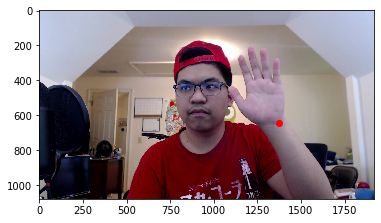

In [17]:
# Which index represents the wrist dot...?
plt.imshow(cv2.cvtColor(frames[0], cv2.COLOR_BGR2RGB))
i = 7
plt.plot(keypoints[i][0], keypoints[i][1], 'ro')
print(keypoints[i])

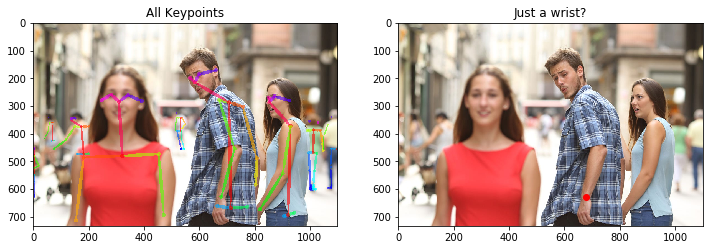

In [18]:
# Is that index consistent across images?
# Load image into an OpenPose Datum object
p = 1
i = 7
distracted = getPoseData(cv2.imread("distracted.jpg"))
keypoints = distracted.poseKeypoints
keypoints = keypoints[p].reshape((-1, 3))

# Show all keypoints
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(cv2.cvtColor(distracted.cvOutputData, cv2.COLOR_BGR2RGB))
plt.title('All Keypoints')
plt.subplot(122)
plt.imshow(cv2.cvtColor(cv2.imread("distracted.jpg"), cv2.COLOR_BGR2RGB))
plt.plot(keypoints[i][0], keypoints[i][1], 'ro')
plt.title('Just a wrist?')
plt.show()

### Index 7 of poseKeypoints[person] references the wrist data.

Explanation of the poseKeypoints data matrix:
- 3 dimensional matrix: (personID, pointID, (x, y, score))

### Get only wrist data over time

In [21]:
# Load OpenPose default params?
params = dict()
params["model_folder"] = "C:\\Users\\mrpho\\Documents\\GitHub\\openpose\\models"

# Start OpenPose
opWrapper = op.WrapperPython()
opWrapper.configure(params)
opWrapper.start()

def getWristPositions(video_filepath):
    frames = []
    wrist_points = []
    
    video = cv2.VideoCapture(video_filepath)
    
    if (video.isOpened() is False):
        print("Error opening video stream or file")
    else:
        print("Opened " + video_filepath + " successfully.")
    
    while True:
        success, image = video.read()
        if success is False:
            break

        frames.append(image)
        poseData = getPoseData(image)
        wrist_point = poseData.poseKeypoints[0].reshape((-1, 3))[7]
        wrist_points.append(wrist_point)
    
    video.release()
    print("Finished getting frames.")
    print("Frames captured: ", len(frames))
    return frames, wrist_points

In [22]:
frames, wrist_points = getWristPositions("triangle.mp4")

Opened triangle.mp4 successfully.
Finished getting frames.
Frames captured:  138


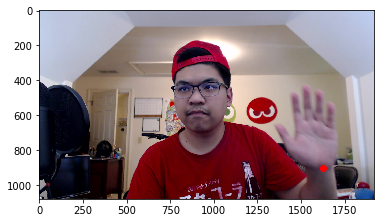

In [33]:
i = 40
plt.imshow(cv2.cvtColor(frames[i], cv2.COLOR_BGR2RGB))
plt.plot(wrist_points[i][0], wrist_points[i][1], 'ro')

In [38]:
datum = getPoseData(frames[37])

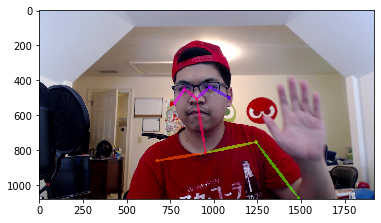

In [39]:
plt.imshow(cv2.cvtColor(datum.cvOutputData, cv2.COLOR_BGR2RGB))

In [37]:
for i in range(len(wrist_points)):
    print("frame " + str(i) + ":", wrist_points[i])

frame 0: [1.3749430e+03 6.4216626e+02 5.8580428e-01]
frame 1: [1.3750034e+03 6.4503528e+02 5.8973312e-01]
frame 2: [1.3720992e+03 6.4210938e+02 5.5589139e-01]
frame 3: [1.3720912e+03 6.3626971e+02 5.3771710e-01]
frame 4: [1.374940e+03 6.421425e+02 5.540974e-01]
frame 5: [1.3748851e+03 6.3921143e+02 5.1296610e-01]
frame 6: [1.3749456e+03 6.4496680e+02 5.7480484e-01]
frame 7: [1.3749254e+03 6.4208307e+02 5.5520761e-01]
frame 8: [1.3750034e+03 6.4204889e+02 5.5863005e-01]
frame 9: [1.3720642e+03 6.3329553e+02 5.0501561e-01]
frame 10: [1.3720129e+03 6.4208221e+02 5.4677755e-01]
frame 11: [1.3720835e+03 6.3920282e+02 5.2421492e-01]
frame 12: [1.3748959e+03 6.3038098e+02 5.1325774e-01]
frame 13: [1.3661921e+03 6.2737134e+02 5.0296474e-01]
frame 14: [1.3719938e+03 6.2738495e+02 4.8737013e-01]
frame 15: [1.3691257e+03 6.2153723e+02 4.8805323e-01]
frame 16: [1.3690789e+03 6.2147040e+02 4.7617990e-01]
frame 17: [1.3720878e+03 6.1267902e+02 4.9185079e-01]
frame 18: [1.3662070e+03 6.0092676e+02 4.

Text(0.5, 1.0, 'Frame 67')

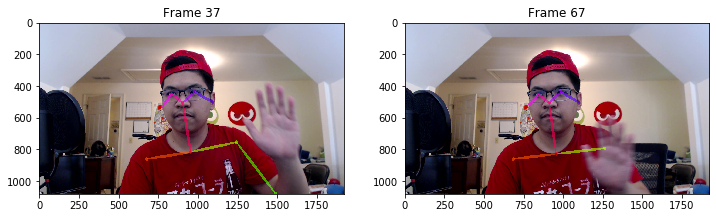

In [40]:
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(cv2.cvtColor(getPoseData(frames[37]).cvOutputData, cv2.COLOR_BGR2RGB))
plt.title('Frame 37')
plt.subplot(122)
plt.imshow(cv2.cvtColor(getPoseData(frames[67]).cvOutputData, cv2.COLOR_BGR2RGB))
plt.title('Frame 67')

In [49]:
def getWristPositionChanges(wrist_points):
    d_wrist_points = []
    for i in range(len(wrist_points) - 1):
        dx = wrist_points[i+1][0] - wrist_points[i][0]
        dy = wrist_points[i+1][0] - wrist_points[i][0]
        d_wrist_points.append([dx, dy])
    return d_wrist_points

In [51]:
d_wrist_points = getWristPositionChanges(wrist_points)
for i in range(len(d_wrist_points)):
    print("frame " + str(i) + ":", d_wrist_points[i])

frame 0: [0.060424805, 0.060424805]
frame 1: [-2.9041748, -2.9041748]
frame 2: [-0.008056641, -0.008056641]
frame 3: [2.848755, 2.848755]
frame 4: [-0.05480957, -0.05480957]
frame 5: [0.060424805, 0.060424805]
frame 6: [-0.020141602, -0.020141602]
frame 7: [0.07800293, 0.07800293]
frame 8: [-2.939209, -2.939209]
frame 9: [-0.05126953, -0.05126953]
frame 10: [0.07055664, 0.07055664]
frame 11: [2.812378, 2.812378]
frame 12: [-8.703735, -8.703735]
frame 13: [5.8016357, 5.8016357]
frame 14: [-2.868042, -2.868042]
frame 15: [-0.046875, -0.046875]
frame 16: [3.0089111, 3.0089111]
frame 17: [-5.8807373, -5.8807373]
frame 18: [-0.03564453, -0.03564453]
frame 19: [-0.03967285, -0.03967285]
frame 20: [11.889526, 11.889526]
frame 21: [2.8323975, 2.8323975]
frame 22: [2.9804688, 2.9804688]
frame 23: [5.845215, 5.845215]
frame 24: [-2.9073486, -2.9073486]
frame 25: [5.8742676, 5.8742676]
frame 26: [8.928833, 8.928833]
frame 27: [8.716309, 8.716309]
frame 28: [14.710571, 14.710571]
frame 29: [5.9743

IndexError: list index out of range

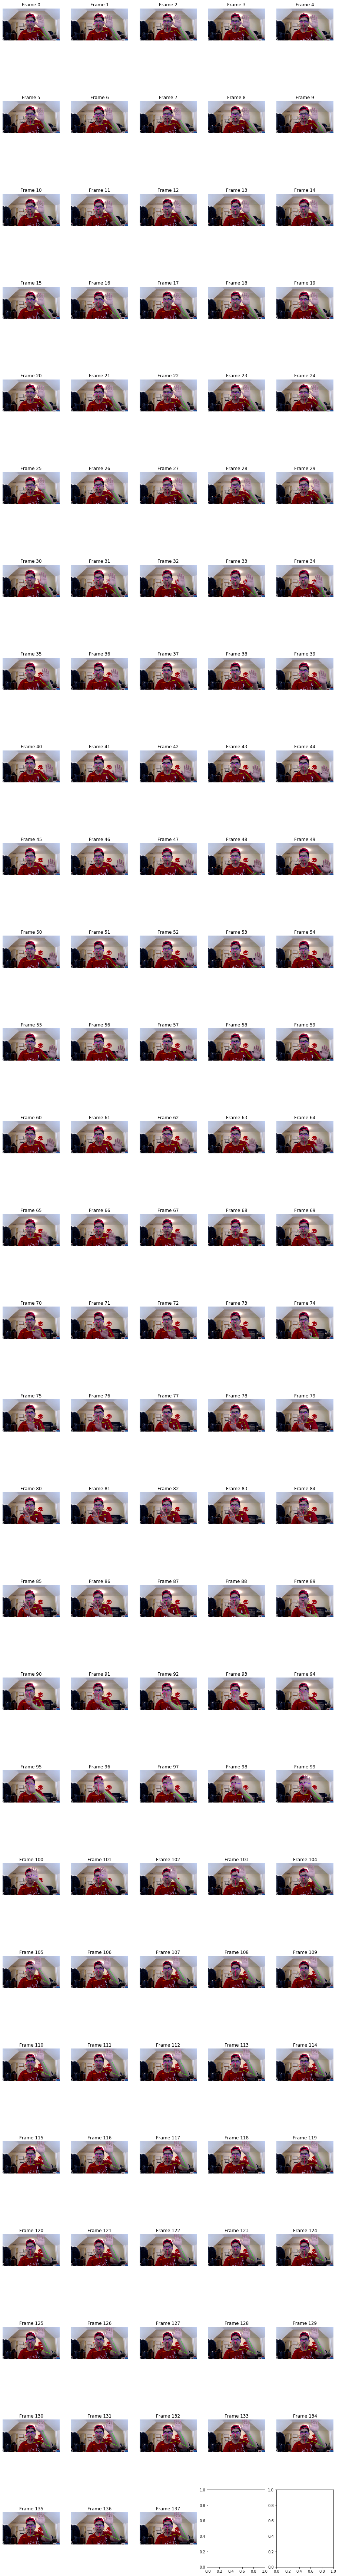

In [66]:
i1 = 0
i2 = 137
fig, plots = plt.subplots(math.ceil((i2 - i1) / 5), 5, figsize=(16,128))
i = i1
for y in range(math.ceil((i2 - i1) / 5)):
    for x in range(5):
        plots[y][x].imshow(cv2.cvtColor(getPoseData(frames[i]).cvOutputData, cv2.COLOR_BGR2RGB))
        plots[y][x].axis("off")
        plots[y][x].set_title("Frame " + str(i))
        i += 1

In [1]:
for i in range(10):
    print(i)
    i += 3

0
1
2
3
4
5
6
7
8
9
